In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
titanic_data=pd.read_csv('train_clean.csv')
titanic_data.sample(5)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
502,22.00,NaN,Q,7.6292,"O'Sullivan, Miss. Bridget Mary",0,503,3,female,0,0,330909,Miss,0
825,30.00,NaN,Q,6.9500,"Flynn, Mr. John",0,826,3,male,0,0,368323,Mr,0
595,36.00,NaN,S,24.1500,"Van Impe, Mr. Jean Baptiste",1,596,3,male,1,0,345773,Mr,2
766,49.00,NaN,C,39.6000,"Brewe, Dr. Arthur Jackson",0,767,1,male,0,0,112379,Dr,0
755,0.67,NaN,S,14.5000,"Hamalainen, Master. Viljo",1,756,2,male,1,1,250649,Master,2


In [58]:
print('Passenger count = ',len(titanic_data.index))

Passenger count =  891


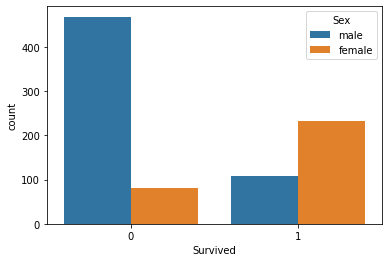

In [59]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

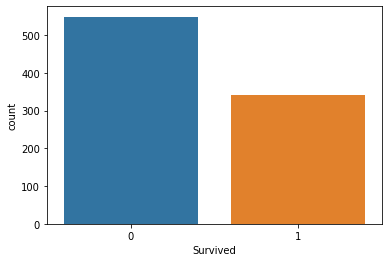

In [60]:
sns.countplot(x='Survived',data=titanic_data)

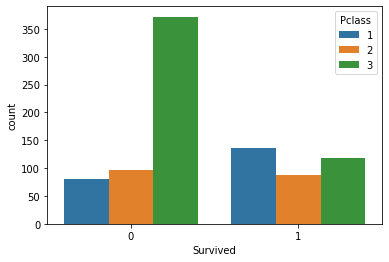

In [61]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

In [63]:
titanic_data.isnull().any()

Age            False
Cabin           True
Embarked       False
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived       False
Ticket         False
Title          False
Family_Size    False
dtype: bool

In [64]:
titanic_data.drop('Cabin',axis=1,inplace=True)


In [65]:
titanic_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,0


In [66]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True) #drop_first=True  One column is enough. 
sex


,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [67]:
embarked=pd.get_dummies(titanic_data['Embarked'])
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [68]:
titanic_data=pd.concat([titanic_data,sex,embarked],axis=1)

In [69]:
titanic_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size,male,C,Q,S
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,1,1,0,0,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,1,0,1,0,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,0,0,0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,1,0,0,0,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,0,1,0,0,1


In [74]:
titanic_data=titanic_data.drop(['Embarked','Fare','Sex','Ticket','PassengerId','Title','Name'],axis=1)

KeyError: "['Embarked' 'Fare' 'Sex' 'Ticket' 'PassengerId' 'Title' 'Name'] not found in axis"

In [75]:
x=titanic_data.drop(['Survived'],axis=1)
y=titanic_data.Survived

In [76]:
titanic_data.sample(5)

,Age,Parch,Pclass,SibSp,Survived,Family_Size,male,C,Q,S
371,18.0,0,3,1,0,1,1,0,0,1
44,19.0,0,3,0,1,0,0,0,1,0
582,54.0,0,2,0,0,0,1,0,0,1
226,19.0,0,2,0,1,0,1,0,0,1
795,39.0,0,2,0,0,0,1,0,0,1


In [77]:
from sklearn.model_selection import train_test_split #cross_validation
from sklearn.linear_model import LogisticRegression

In [78]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [79]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\kavya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
pred=model.predict(X_test)


In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [82]:
accuracy_score(y_test,pred)


0.7597765363128491

In [98]:
confusion_matrix(y_test,pred)

array([[92, 13],
       [30, 44]], dtype=int64)